In [1]:
import numpy as np
import pandas as pd
import os
import sqlalchemy as sqla
import sqlite3 as sql
from sqlite3 import Error
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_loc = os.getcwd()

In [3]:
file_loc

'C:\\Users\\Administrator\\1-STA208\\STA-208-project'

In [4]:
db1= sql.connect(file_loc+"\data1.db")
df1=pd.read_sql("SELECT * FROM loan",db1)
db2= sql.connect(file_loc+"\data2.db")
df2=pd.read_sql("SELECT * FROM loan",db2)
db3= sql.connect(file_loc+"\data3.db")
df3=pd.read_sql("SELECT * FROM loan",db3)
db4= sql.connect(file_loc+"\data4.db")
df4=pd.read_sql("SELECT * FROM loan",db4)
db5= sql.connect(file_loc+"\data5.db")
df5=pd.read_sql("SELECT * FROM loan",db5)
db6= sql.connect(file_loc+"\data6.db")
df6=pd.read_sql("SELECT * FROM loan",db6)
db7= sql.connect(file_loc+"\data7.db")
df7=pd.read_sql("SELECT * FROM loan",db7)
db8= sql.connect(file_loc+"\data8.db")
df8=pd.read_sql("SELECT * FROM loan",db8)
db9= sql.connect(file_loc+"\data9.db")
df9=pd.read_sql("SELECT * FROM loan",db9)
db10= sql.connect(file_loc+"\data10.db")
df10=pd.read_sql("SELECT * FROM loan",db10)
db11= sql.connect(file_loc+"\data11.db")
df11=pd.read_sql("SELECT * FROM loan",db11)
db12= sql.connect(file_loc+"\data12.db")
df12=pd.read_sql("SELECT * FROM loan",db12)

In [5]:
df = pd.DataFrame()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df.shape

(434407, 65)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,17600,17600,17600,36 months,10.75%,574.12,B,B4,RENT,57109,...,6,0,1,95.1,1,0,88629,83563,2300,80329
1,12500,12500,12500,60 months,8.39%,255.8,B,B1,RENT,120000,...,9,0,1,100,0,0,80899,40673,48400,32499
2,10000,10000,10000,36 months,11.99%,332.1,C,C1,MORTGAGE,75000,...,9,0,2,100,0,1,71858,48844,0,60358
3,3000,3000,3000,36 months,7.39%,93.17,A,A4,RENT,80000,...,6,0,0,95,0,0,221908,25665,42200,30936
4,2000,2000,2000,36 months,6.49%,61.29,A,A2,RENT,90000,...,19,0,2,97.3,0,0,176338,68841,122100,48438


Notice that the grade and subgrade variables are assessed directly from the interest rate, that is, the variable int_rate. Thus, mere int_rate suffices to cover the information provided by them, and grade and subgrade can be removed from our list of variables. Also zip_code is not appropriate to be deemed as a variable and issue_d doesn't contain valuable information, we also drop both of them.

#### Dummy variables

Among the 59 variables we have now, some of them are quantitative and have only a few statuses. For these variables, we can establish dummy variables that take either 0 or 1. For quantitative variables that have more than two categories, we combine some of to create more synthesized categories.

For the resonse variable loan_status, because it has 7 different categories, Fully paid, Current, In Grace Period, Late(16-30 days), Late(31-120 days), Default, Charged Off, we want to categorize them into two groups that result to a binary variable. Since the first two categories are signs of a good status of loan, and the latter five indicate different extents of late payment, we denote good status as Fully paid or Current, and bad status as In Grace Period, Late(16-30 days), Late(31-120 days), Default or Charged Off.

loan_status$=
\left\{\begin{array}{cl} 
		1,& \text{good status}\\
		0,& \text{bad status}
	\end{array}\right.$

And among the predictor varibles, purpose also has multiple categories: car, home-improvement, house, moving, major_purchase, renewable_enery, credit_card, debt_consolidation, small_business, medical, vacation and other, which requires many dummy variables. To make the situation simpler, except for medical, we classify car, home_improvement, house, moving, major_purchase and renewable_enery as property, credit_card, debt_consolidation and small_business as financial, vacation and other as others. Therefore, we get 4 categories of purposes, which can be represented by 3 dummy variables:

purpose1$=
\left\{\begin{array}{cl} 
		1,& \text{property}\\
		0,& \text{others} 
	\end{array}\right.$, 
purpose2$= 
\left\{\begin{array}{cl} 
		1,&\text{financial} \\
		0,&\text{others} 
	\end{array}\right.$, 
purpose3$=
\left\{\begin{array}{cl} 
		1,&\text{medical} \\
		0,&\text{others}  
	\end{array}\right.$

Also note that addr_state records the state address of the borrower. Considering the data is collected from Lending Club, which locates in San Francisco, CA, we want to know whether it makes a difference if the loan request is from an instate borrower or not. In this case, we only have to make a distinction between a California loaner and a non California borrower.

addr_state$=
\left\{\begin{array}{cl} 
		1,&\text{California} \\
		0,&\text{other states}  
	\end{array}\right.$

Similarly, in verification_status, we combine verified and source verified as verified:

verification_status$=
\left\{\begin{array}{cl} 
		1,& \text{verified}\\
		0, & \text{not verified}
	\end{array}\right.$
 
There are 4 more qualitative variables, which are coded as below:

term$=
\left\{\begin{array}{cl} 
		1,&\text{36 months} \\
		0,&\text{60 others}  
	\end{array}\right.$
 
home_ownership1$=
\left\{\begin{array}{cl} 
		1,& \text{rent}\\
		0,& \text{any}  
	\end{array}\right.$, 
home_ownership2$=
\left\{\begin{array}{cl} 
		1,& \text{own}\\
		0,& \text{any}
	\end{array}\right.$, 
home_ownership3$=
\left\{\begin{array}{cl} 
		1,& \text{mortage}\\
		0,& \text{any} 
	\end{array}\right.$

initial_list_status$=
\left\{\begin{array}{cl} 
		1,& \text{whole}\\
		0,& \text{fraction}
	\end{array}\right.$

application_type$=
\left\{\begin{array}{cl} 
		1,& \text{Individual}\\
		0,& \text{Joint App}
	\end{array}\right.$

In [110]:
data = df.copy()

col_drop = ['grade','sub_grade','issue_d','earliest_cr_line','grade','zip_code',
            'last_credit_pull_d', 'total_pymnt_inv','funded_amnt','funded_amnt_inv']
data = data.drop(col_drop, axis = 1)
data = data.reset_index(drop=True)

In [111]:
y_temp = data['loan_status']

In [112]:
# recode loan_status
y = y_temp.copy()
for i in range(len(y)):
    if (y_temp[i] == 'Fully Paid') or (y_temp[i] == 'Current'):
        y[i] = 'good'
    else:
        y[i] = 'bad'

In [113]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: loan_status, dtype: object

In [114]:
purpose_temp = data['purpose']

In [115]:
#recode purposes
purpose = purpose_temp.copy()
for i in range(len(purpose)):
    if (purpose_temp[i] == 'credit_card') or ( purpose_temp[i] == 'debt_consolidation') or (purpose_temp[i] == 'small_business'):
        purpose[i] = 'finantial'
    elif (purpose_temp[i] == 'vacation') or (purpose_temp[i] == 'other'):
        purpose[i] = 'others'
    elif purpose_temp[i] == 'medical':
        purpose[i] == 'medical'
    else:
        purpose[i] = 'property'

In [116]:
purpose.head()

0    finantial
1    finantial
2    finantial
3       others
4    finantial
Name: purpose, dtype: object

In [117]:
addr_state_temp = data['addr_state']

In [118]:
#recode addr_state
addr_state = addr_state_temp.copy()
for i in range(len(y)):
    if addr_state_temp[i] == 'CA':
        addr_state[i] = 'CA'
    else:
        addr_state[i] = 'other'

In [119]:
addr_state.head()

0    other
1    other
2    other
3    other
4    other
Name: addr_state, dtype: object

In [120]:
verification_status_temp = data['verification_status']

In [121]:
#recode addr_state
verification_status = verification_status_temp.copy()
for i in range(len(y)):
    if verification_status_temp[i] == 'Not Verified':
        verification_status[i] = 'not verified'
    else:
        verification_status[i] = 'verified'

In [122]:
verification_status.head()

0        verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verification_status, dtype: object

In [123]:
#Create dummy variables
dummy1 = pd.get_dummies(y)
dummy2 = pd.get_dummies(purpose)
dummy3 = pd.get_dummies(addr_state)
dummy4 = pd.get_dummies(data['term'])
dummy5 = pd.get_dummies(data['home_ownership'])
dummy6 = pd.get_dummies(verification_status)
dummy7 = pd.get_dummies(data['initial_list_status'])
dummy8 = pd.get_dummies(data['application_type'])

In [124]:
data_category = ['loan_status','verification_status','addr_state', 'term', 'initial_list_status',
                 'application_type','finantial','medical','property','MORTGAGE','OWN','RENT']

In [125]:
#Insert dummy variables into dataset
data['loan_status'] = dummy1['good']
data['addr_state'] = dummy3['CA']
data['term'] = dummy4[' 36 months']
data['verification_status'] = dummy6['verified']
data['initial_list_status'] = dummy7['w']
data['application_type'] = dummy8['Individual']

data = data.drop(['purpose','home_ownership'], axis = 1)
data = pd.concat([data, dummy2.iloc[:,[0,1,3]],dummy5.iloc[:,1:4]],axis = 1)

# convert all data as float
data['int_rate'] = [x[:-1] for x in data['int_rate']]
data = data.astype(float)
data['int_rate'] = data['int_rate']/100

data.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,addr_state,delinq_2yrs,open_acc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,finantial,medical,property,MORTGAGE,OWN,RENT
0,17600.0,1.0,0.1075,574.12,57109.0,1.0,1.0,0.0,0.0,6.0,...,88629.0,83563.0,2300.0,80329.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12500.0,0.0,0.0839,255.80,120000.0,0.0,1.0,0.0,0.0,9.0,...,80899.0,40673.0,48400.0,32499.0,1.0,0.0,0.0,0.0,0.0,1.0
2,10000.0,1.0,0.1199,332.10,75000.0,0.0,1.0,0.0,0.0,9.0,...,71858.0,48844.0,0.0,60358.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3000.0,1.0,0.0739,93.17,80000.0,0.0,1.0,0.0,1.0,6.0,...,221908.0,25665.0,42200.0,30936.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2000.0,1.0,0.0649,61.29,90000.0,0.0,1.0,0.0,0.0,19.0,...,176338.0,68841.0,122100.0,48438.0,1.0,0.0,0.0,0.0,0.0,1.0


dummy1['good']

dummy2.iloc[:,[0,1,3]]

dummy3['CA']

dummy4[' 36 months']

dummy5.iloc[:,1:4]

dummy6['verified']

dummy7['w']

dummy8['Individual']

In [127]:
from pyglmnet import GLM
from pyglmnet.datasets import fetch_group_lasso_datasets

In [128]:
data_lasso = data.copy()

In [129]:
from  sklearn.preprocessing  import scale
data_lasso[data.columns[~data_lasso.columns.isin(data_category)]]=scale(data_lasso[data.columns[~data_lasso.columns.isin(data_category)]])

In [130]:
X = data_lasso[data_lasso.columns.difference(['loan_status'])].values
y = data_lasso.loc[:, 'loan_status'].values

In [131]:
group_idxs = np.arange(len(data_lasso.columns)-1)+1
group_idxs[-3:] = group_idxs[-5]
group_idxs[-6:-3] = group_idxs[-6]
group_idxs = group_idxs.astype('int64')
group_idxs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 54, 54, 55, 55, 55], dtype=int64)

In [132]:
X=X.astype(float)

In [133]:
#set up the group lasso GLM model
gl_glm = GLM(distr="binomial",
             tol=1e-2,
             group=group_idxs,
             score_metric="pseudo_R2",
             #solver = 'cdfast',
             alpha=1,
             reg_lambda=np.logspace(np.log(100), np.log(.01), 300, base=np.exp(1)))

In [134]:
gl_glm.fit(X, y)

<
Distribution | binomial
alpha | 1.00
max_iter | 1000.00
lambda: 100.00 to 0.01
>

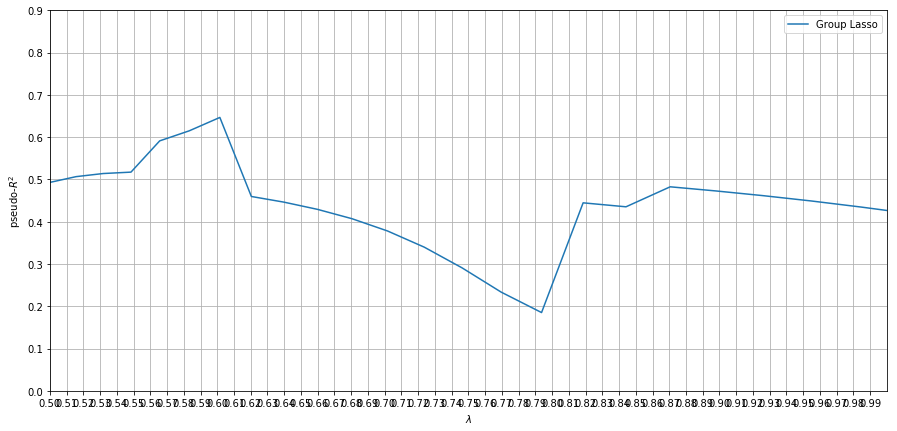

In [103]:
plt.figure(figsize=(15,7))
plt.plot(gl_glm.reg_lambda, gl_glm.score(X, y), label = 'Group Lasso')
plt.xlabel('$\lambda$')
plt.ylabel('pseudo-$R^2$')
#plt.ylim([-0.1, 0.7])
plt.xlim([.5,1])

plt.tick_params(axis='y', right='off')
plt.tick_params(axis='x', top='off')
ax = plt.gca()

ax.set_xticks(np.arange(0.5, 1,.01))
#ax.set_xticks(np.arange(0, 1, .05))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.grid()

plt.legend()
plt.show()

In [149]:
# upon above graph, we are able to get the best lambda and best beta which are the following:
print('Best lambda is',np.logspace(np.log(100), np.log(.01), 300, base=np.exp(1))[166])
best_beta_1 = gl_glm.fit_[166]['beta']
best_beta_1[-6:]

Best lambda is 0.6015395880274836


array([[ 0.16644152],
       [ 0.05328055],
       [-0.11303911],
       [ 0.2387712 ],
       [ 0.02222806],
       [ 0.08758874]])

In [140]:
sum(abs(best_beta_1)>.05)

array([25])

In [142]:
select_X = abs(best_beta_1)>.05
# below are the selected x variables
selected_X = data.columns.drop('loan_status')[select_X.T[0]]
data[selected_X].head()

,loan_amnt,term,int_rate,annual_inc,delinq_2yrs,total_acc,initial_list_status,out_prncp_inv,total_pymnt,total_rec_prncp,...,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,total_bc_limit,finantial,medical,property,MORTGAGE,RENT
0,17600.0,1.0,0.1075,57109.0,0.0,46.0,0.0,0.00,18705.740000,17600.00,...,4.0,2.0,6.0,1.0,2300.0,1.0,0.0,0.0,0.0,1.0
1,12500.0,0.0,0.0839,120000.0,0.0,12.0,1.0,7716.54,6639.150000,4783.46,...,6.0,4.0,9.0,1.0,48400.0,1.0,0.0,0.0,0.0,1.0
2,10000.0,1.0,0.1199,75000.0,0.0,38.0,0.0,3145.38,8621.280000,6854.62,...,5.0,3.0,9.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3000.0,1.0,0.0739,80000.0,1.0,20.0,0.0,588.27,2713.350000,2411.73,...,4.0,3.0,6.0,0.0,42200.0,0.0,0.0,0.0,0.0,1.0
4,2000.0,1.0,0.0649,90000.0,0.0,37.0,1.0,0.00,2108.983908,2000.00,...,17.0,7.0,19.0,2.0,122100.0,1.0,0.0,0.0,0.0,1.0


In [145]:
sum(data['loan_status'] == 1)/data.shape[0]

0.867405451569611

Through setting the threshold - the coefficient is larger than $0.05$, we finally get the following $25$ X variables:

1) loan_amount: the list amount of the loan applied by the borrowers;

2)* term: The number of payments on the loan. 36months/60months;

3) int_rate: interest rate on the loan;

4) annual_inc: The self-reported annual income provided by the borrower during registration;

5) delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years;

6) total_acc:  The total number of credit lines currently in the borrower's credit file;

7)* initial_list_status: The initial listing status of the loan. Possible values are – W, F;

8) out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors;

9) total_pymnt: Payments received to date for total amount funded;

10) total_rec_prncp: Principal received to date;

11) total_rec_int: Interest received to date;

12) total_rec_late_fee: Late fees received to date;

13) recoveries: post charge off gross recovery;

14) num_bc_sats: Number of satisfactory bankcard accounts;

15) num_bc_tl: Number of bankcard accounts;

16) num_op_rev_tl: Number of open revolving accounts;

17) num_rev_tl_bal_gt_0: Number of revolving trades with balance >0;

18) num_sats: Number of satisfactory accounts;

19) num_tl_op_past_12m: Number of accounts opened in past 12 months;

20) total_bc_limit: Total bankcard high credit/credit limit;

21)* finantial, medical, property: Purpose;

22)* MORTGAGE, RENT: home_ownership.

In [161]:
selected_X_0 = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'delinq_2yrs',
       'total_acc', 'initial_list_status', 'out_prncp_inv', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_op_past_12m', 'total_bc_limit', 'finantial',
       'medical', 'property', 'MORTGAGE', 'RENT']

In [163]:
data_fnl = pd.concat([data_lasso[selected_X_0], data_lasso['loan_status']],axis = 1)

In [166]:
### training and test set split
#Split the data into training set(75% of data) and testing set(25% of data)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_fnl, test_size = 0.25, random_state = 0)

## get the train and test data set
X_tr = train[train.columns.difference(['loan_status'])].values
y_tr = train.loc[:, 'loan_status'].values

X_te = test[test.columns.difference(['loan_status'])].values
y_te = test.loc[:, 'loan_status'].values

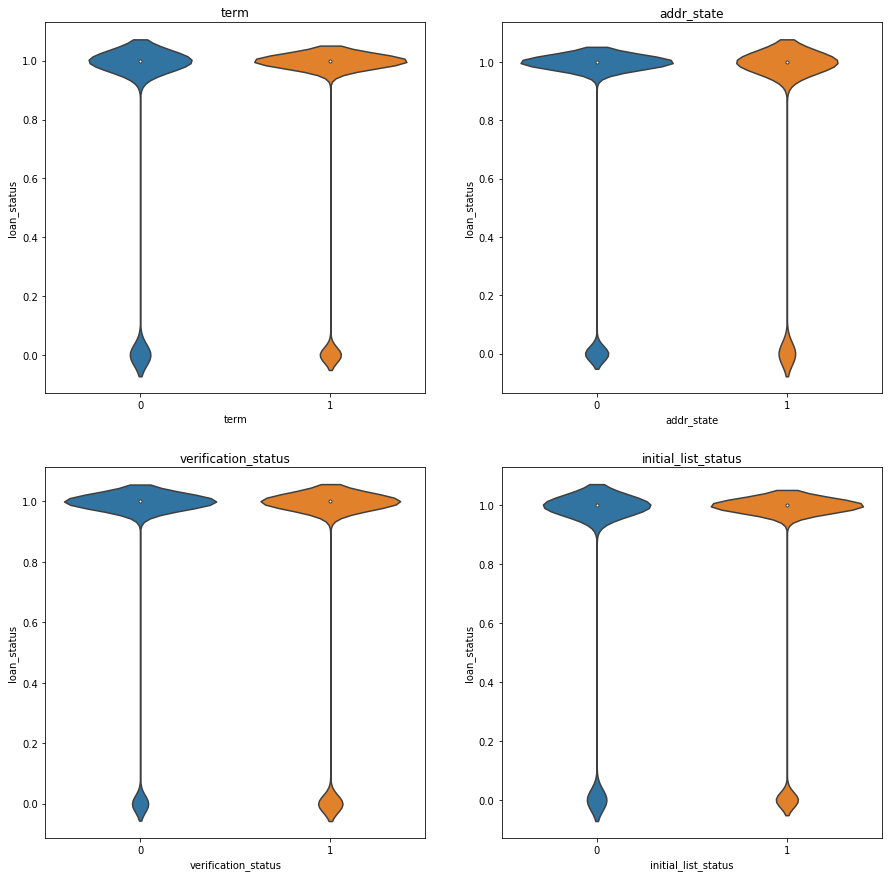

In [35]:
# Analysis of categorical variables
# violin plot to check the distribution of qualitative variables
# 'term', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status',
# 'application_type'
f, axes = plt.subplots(2, 2, figsize=(15,15))
buckets = ['term', 'addr_state', 'verification_status', 'initial_list_status']

for i in buckets:
    catg = data[["loan_status",i]]
    row = buckets.index(i) // 2
    col = buckets.index(i) % 2
    ax_curr = axes[row, col]
    sns.violinplot(x=i, y="loan_status", data=catg, ax=ax_curr)
    ax_curr.set_title(i)

plt.show()

__Logistic Regression:__

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
data_fnl['loan_status'].value_counts()

1.0    376807
0.0     57600
Name: loan_status, dtype: int64

In [169]:
data_fnl.groupby('loan_status').mean()

,loan_amnt,term,int_rate,annual_inc,delinq_2yrs,total_acc,initial_list_status,out_prncp_inv,total_pymnt,total_rec_prncp,...,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,total_bc_limit,finantial,medical,property,MORTGAGE,RENT
loan_status,,,,,,,,,,,,,,,,,,,,,
0.0,0.102077,0.680000,0.566207,-0.077200,0.038118,0.019682,0.731267,-0.427311,-0.544480,-0.681931,...,0.055567,0.096176,0.050822,0.245521,-0.163191,0.804253,0.014132,0.108819,0.416059,0.461146
1.0,-0.015604,0.754569,-0.086552,0.011801,-0.005827,-0.003009,0.773900,0.065320,0.083231,0.104242,...,-0.008494,-0.014702,-0.007769,-0.037531,0.024946,0.793438,0.012277,0.121203,0.497738,0.379988


In [170]:
logreg=LogisticRegression()
logreg.fit(X_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
y_pred = logreg.predict(X_te)

In [187]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_te, y_te)))

Accuracy of logistic regression classifier on test set: 0.97


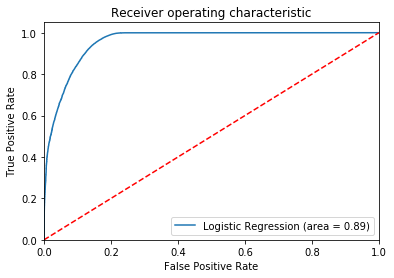

In [189]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_te, logreg.predict(X_te))
fpr, tpr, thresholds = roc_curve(y_te, logreg.predict_proba(X_te)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [176]:
logreg.coef_[0]

array([ 1.47922626e-01, -6.89886903e-02,  1.25976314e-01, -7.15114287e-03,
       -1.71558633e-01, -9.04782527e-02, -4.01236371e-01, -2.22989161e+01,
       -1.20392273e-01, -1.00522424e-01, -2.98746601e-02,  4.47714429e-02,
       -7.63674144e-02,  3.90062454e-02, -1.42926342e-01,  1.44087281e+01,
       -6.63652650e-02, -8.68628663e+00, -1.35100531e+00, -5.81920697e-02,
        2.89218476e-01,  8.83828328e+00, -1.93798423e+00, -4.20644894e-01,
        1.10540419e+01])

In [186]:
best_beta_1[select_X.T[0]].T[0]

array([ 0.41728253,  0.22312659,  0.25035068, -0.13057753,  0.15544497,
       -0.47229493, -0.05682666,  0.30609711,  0.30539769, -0.30838795,
       -0.3463868 ,  0.4893977 , -0.28748542,  0.28732588,  0.28755715,
        0.24377843, -0.44049728, -0.05264153,  0.11303518,  0.10057491,
        0.16644152,  0.05328055, -0.11303911,  0.2387712 ,  0.08758874])

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(gl_glm.reg_lambda, gl_glm.score(X, y), label = 'Group Lasso')
plt.xlabel('')
plt.ylabel('pseudo-$R^2$')
#plt.ylim([-0.1, 0.7])
plt.xlim([.5,1])

plt.tick_params(axis='y', right='off')
plt.tick_params(axis='x', top='off')
ax = plt.gca()

ax.set_xticks(np.arange(0.5, 1,.01))
#ax.set_xticks(np.arange(0, 1, .05))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.grid()

plt.legend()
plt.show()